In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# plt.rcParams['figure.figsize'] = [7, 7]

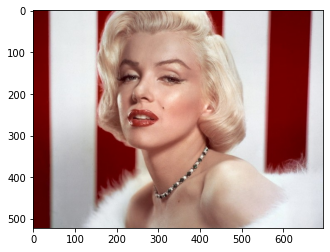

In [3]:
original_image = cv2.imread(
    'monroe.jpg'
)

original_image = original_image[:, :, ::-1]

plt.imshow(original_image);

In [4]:
blank_channel = np.zeros(original_image.shape[:2], dtype='uint8')
blank_image = cv2.merge((blank_channel, blank_channel, blank_channel))

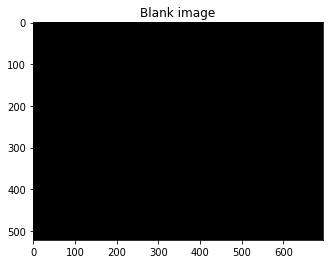

In [5]:
plt.imshow(blank_image)
plt.title('Blank image');

In [6]:
b, g, r = cv2.split(original_image)

In [7]:
red = cv2.merge((r, blank_channel, blank_channel))
green = cv2.merge((blank_channel, g, blank_channel))
blue = cv2.merge((blank_channel, blank_channel, b))

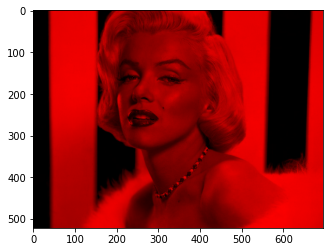

In [8]:
plt.imshow(red);

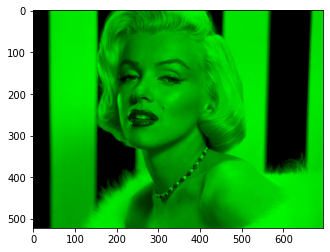

In [9]:
plt.imshow(green);

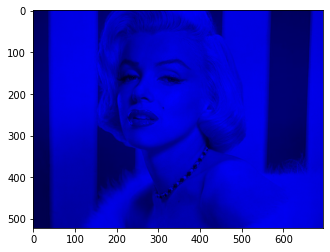

In [10]:
plt.imshow(blue);

In [11]:
merged_image = cv2.merge((b, g, r))

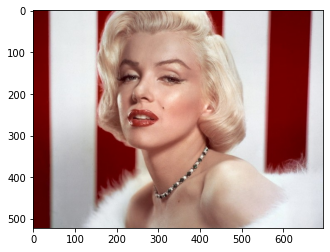

In [12]:
plt.imshow(merged_image);

In [13]:
shift_value = 15

In [14]:
green_center = green.copy()
# green_center[:, 0:100, :] = 0
# green_center[:, -100:, :] = 0

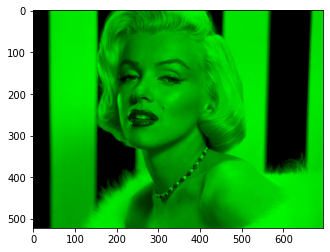

In [15]:
plt.imshow(green_center);

In [16]:
blue_left = blank_image.copy()
blue_left[:, 0:original_image.shape[1]-shift_value, :] = blue[:, shift_value:, :]
plt.imshow(blue_left);

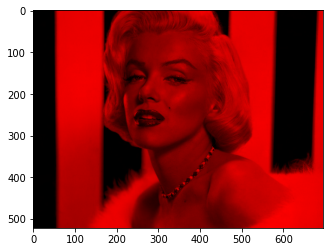

In [17]:
red_right = blank_image.copy()
red_right[:, shift_value:, :] = red[:, 0:-shift_value, :]
plt.imshow(red_right)


In [18]:
processed_image = cv2.merge((cv2.split(blue_left)[2], cv2.split(green_center)[1], cv2.split(red_right)[0]))

In [19]:
plt.imshow(processed_image);

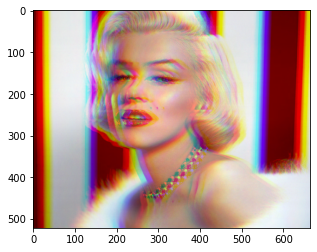

In [20]:
cropped_image = processed_image[:, shift_value:-shift_value, :]
plt.imshow(cropped_image);

In [21]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [22]:
def warhol(pixel_shift_value, img):
    blank_channel = np.zeros(original_image.shape[:2], dtype='uint8')
    blank_image = cv2.merge((blank_channel, blank_channel, blank_channel))

    b, g, r = cv2.split(img)
    
    red = cv2.merge((r, blank_channel, blank_channel))
    green = cv2.merge((blank_channel, g, blank_channel))
    blue = cv2.merge((blank_channel, blank_channel, b))
    
    green_center = green.copy()
    
    blue_left = blank_image.copy()
    blue_left[:, 0:img.shape[1]-pixel_shift_value, :] = blue[:, pixel_shift_value:, :]

    red_right = blank_image.copy()
    red_right[:, pixel_shift_value:, :] = red[:, 0:-pixel_shift_value, :]

    processed_image = cv2.merge((cv2.split(blue_left)[2], cv2.split(green_center)[1], cv2.split(red_right)[0]))
    
    cropped_image = processed_image[:, pixel_shift_value:-pixel_shift_value, :]
    
    # cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
    
    # return cropped_image
    # plt.imshow(cropped_image, cmap='gray', vmin=0, vmax=255);
    plt.imshow(cropped_image)
    plt.axis(False)

In [23]:
interact(warhol, pixel_shift_value=(1,100,1), img=fixed(original_image));

interactive(children=(IntSlider(value=50, description='pixel_shift_value', min=1), Output()), _dom_classes=('w…